# `Digital Image Processing Assignment`

Question:
The following is an image combining a blurry part and a high contrast part. Find an image like this from internet.

You need to apply both the smoothing filter and the sharpening filter in spatial domain. Display the output and explain the effect. 

Demonstrate the same result with low pass and high pass filter in the frequency domain. Attach the code as well. (Marks: 20)

_____________________________________________________
Submitted by: 
Md. Al Siam, 
Roll No: 1603008

# `Picking the Image and Displaying`

In [ ]:
# Getting the image

! wget https://cdn.jhmrad.com/wp-content/uploads/beautiful-small-house-designs_756083-670x400.jpg

--2021-07-03 03:45:05--  https://cdn.jhmrad.com/wp-content/uploads/beautiful-small-house-designs_756083-670x400.jpg
Resolving cdn.jhmrad.com (cdn.jhmrad.com)... 185.93.1.243
Connecting to cdn.jhmrad.com (cdn.jhmrad.com)|185.93.1.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57309 (56K) [image/jpeg]
Saving to: ‘beautiful-small-house-designs_756083-670x400.jpg’

beautiful-small-hou 100%[===================>]  55.97K  --.-KB/s    in 0.07s   

2021-07-03 03:45:06 (781 KB/s) - ‘beautiful-small-house-designs_756083-670x400.jpg’ saved [57309/57309]



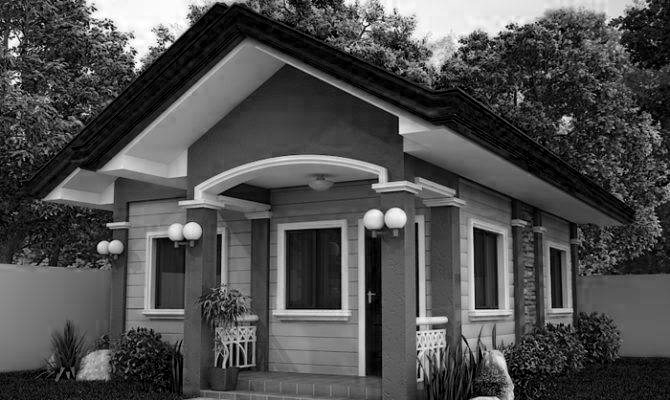

In [ ]:
# display the image

import cv2 
img = cv2.imread("/content/beautiful-small-house-designs_756083-670x400.jpg")
img = img[:,:,:1]
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# `Smoothing Filter: Average Filter`

In [ ]:
import numpy as np

In [ ]:
# Using smoothing filter (average filter)

def averageFilter(img, kernel_size):

    mid_x = int(kernel_size//2)
    mid_y = int(kernel_size//2)

    dx = np.zeros((kernel_size, kernel_size))
    dy = np.zeros((kernel_size, kernel_size))

    kernel = np.ones((kernel_size, kernel_size))/(kernel_size*kernel_size)

    for i in range(kernel_size):
        for j in range(kernel_size):
            dx[i][j] = int(i-mid_x)
            dy[i][j] = int(j-mid_y)

    final_image = np.zeros((img.shape[0], img.shape[1], 1))

    print(mid_x, mid_y, "Kernel = ", kernel, "\n", dx, dy)

    for i in range(int(mid_x), img.shape[0]-(kernel_size//2)):
        # print("\n>", i, " :", end="")
        for j in range(int(mid_y), img.shape[1]-(kernel_size//2)):
            # print(f" {j}", end="")
            sum_making_mean = 0.00
            for k_i in range(kernel_size):
                for k_j in range(kernel_size):
                    sum_making_mean += img[i+int(dx[k_i][k_j])][j+int(dy[k_i][k_j])][0]*kernel[k_i][k_j]
            final_image[i][j][0] = sum_making_mean

    return final_image

In [ ]:
+

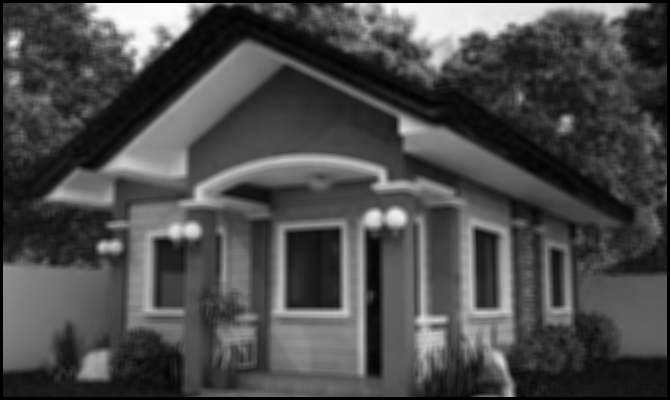

In [ ]:
cv2_imshow(avg_filtered_image)

# `Displaying Original and Blurred Image`

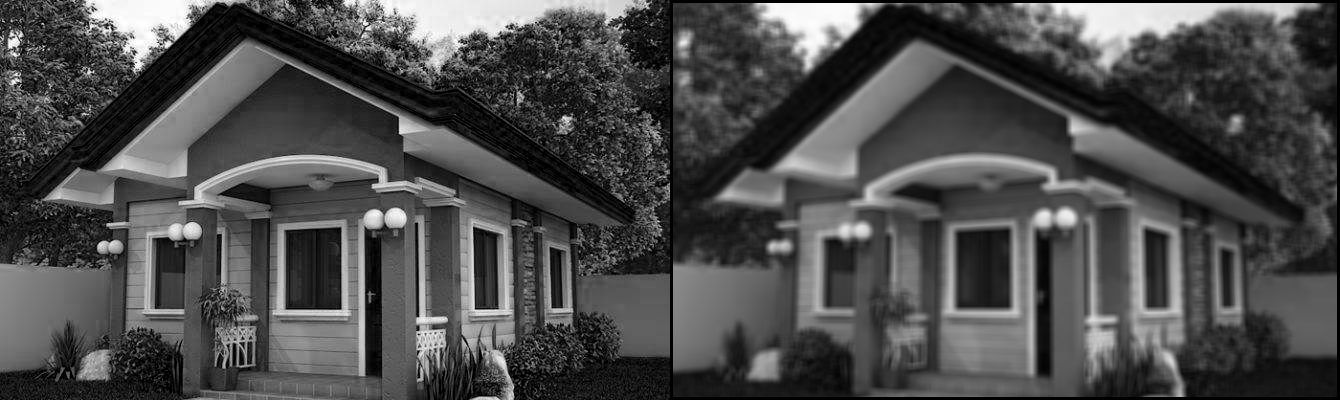

In [ ]:
original_and_blurred = np.hstack((img, avg_filtered_image))
cv2_imshow(original_and_blurred)

# `Sharpening Image: Sobel Filter`

In [ ]:
def sobelFilter(img):
    kernel_size = 3

    mid_x = int(kernel_size//2)
    mid_y = int(kernel_size//2)

    dx = np.zeros((kernel_size, kernel_size))
    dy = np.zeros((kernel_size, kernel_size))

    kernel = [
                [-1, -2, -1],
                [0, 0, 0],
                [1, 2, 1]
             ]

    for i in range(kernel_size):
        for j in range(kernel_size):
            dx[i][j] = int(i-mid_x)
            dy[i][j] = int(j-mid_y)

    final_image = np.zeros((img.shape[0], img.shape[1], 1))

    print(mid_x, mid_y, "Kernel = ", kernel, "\n", dx, dy)

    for i in range(int(mid_x), img.shape[0]-(kernel_size//2)):
        # print("\n>", i, " :", end="")
        for j in range(int(mid_y), img.shape[1]-(kernel_size//2)):
            # print(f" {j}", end="")
            sum_making_mean = 0.00
            for k_i in range(kernel_size):
                for k_j in range(kernel_size):
                    sum_making_mean += img[i+int(dx[k_i][k_j])][j+int(dy[k_i][k_j])][0]*kernel[k_i][k_j]
            final_image[i][j][0] = sum_making_mean

    return final_image

In [ ]:
sobel_filtered_image = sobelFilter(img)

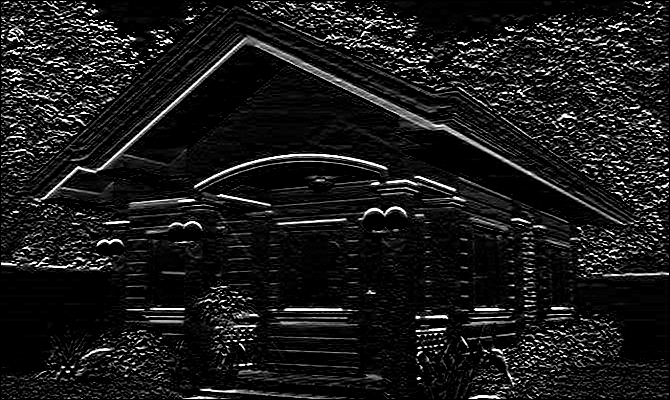

In [ ]:
cv2_imshow(sobel_filtered_image)

# `Sharpening Image: Laplacian Filter`

In [ ]:
# Using smoothing filter (average filter)

def lapalcianFilter(img):
    kernel_size = 3

    mid_x = int(kernel_size//2)
    mid_y = int(kernel_size//2)

    dx = np.zeros((kernel_size, kernel_size))
    dy = np.zeros((kernel_size, kernel_size))

    kernel = [
                [0, -1, 0], 
                [-1, 4, -1], 
                [0, -1, 0]
             ]

    for i in range(kernel_size):
        for j in range(kernel_size):
            dx[i][j] = int(i-mid_x)
            dy[i][j] = int(j-mid_y)

    final_image = np.zeros((img.shape[0], img.shape[1], 1))

    print(mid_x, mid_y, "Kernel = ", kernel, "\n", dx, dy)

    for i in range(int(mid_x), img.shape[0]-(kernel_size//2)):
        # print("\n>", i, " :", end="")
        for j in range(int(mid_y), img.shape[1]-(kernel_size//2)):
            # print(f" {j}", end="")
            sum_making_mean = 0.00
            for k_i in range(kernel_size):
                for k_j in range(kernel_size):
                    sum_making_mean += img[i+int(dx[k_i][k_j])][j+int(dy[k_i][k_j])][0]*kernel[k_i][k_j]
            final_image[i][j][0] = sum_making_mean

    return final_image

In [ ]:
laplacian_filtered_image = lapalcianFilter(img)

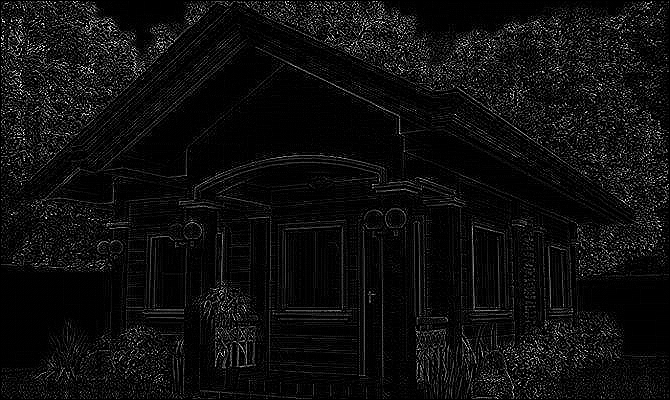

In [ ]:
cv2_imshow(laplacian_filtered_image)

# `Displaying Sharpened Images`

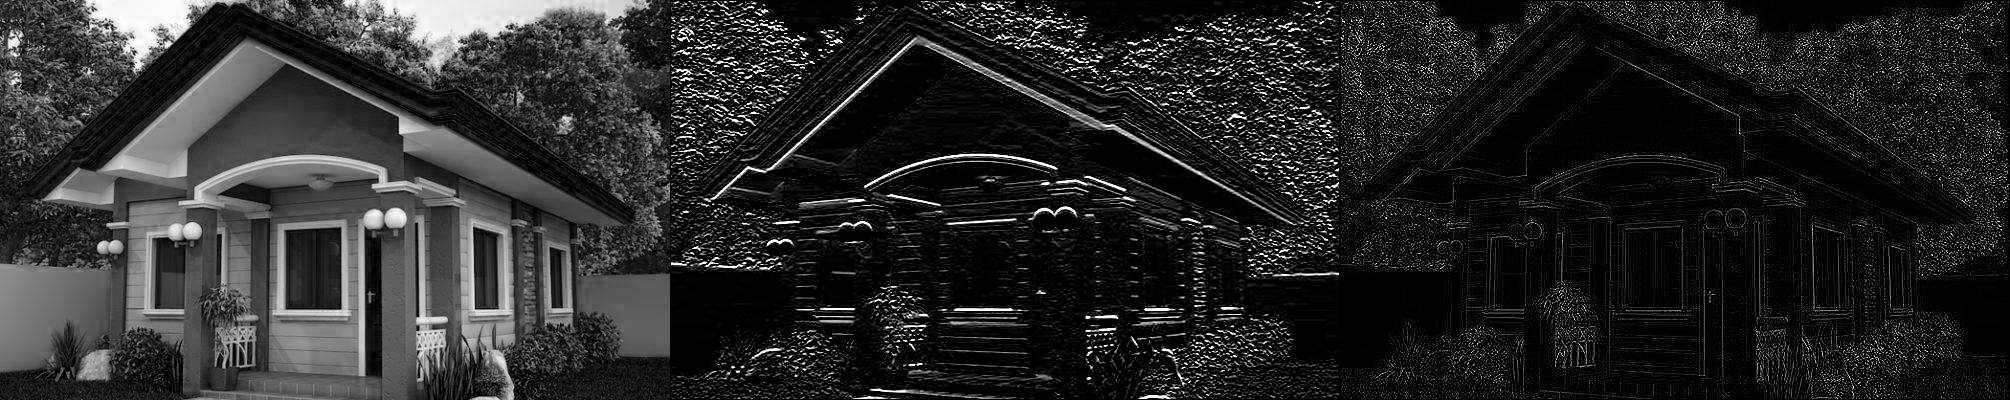

In [ ]:
original_sobel_laplacian = np.hstack((img, sobel_filtered_image, laplacian_filtered_image))
cv2_imshow(original_sobel_laplacian)

# `Explaining the Effects`

Mean filtering is a filter which can smooth or blur the image. It reduces the intensity variation between the adjacent pixels. This replaces the pixel values of an image with the average value of its neighbours. So the adjacent pixel values having high variance is removed. Thereby the variance of the pixel values reduces and the image get smoothed. The greater we take the kernel size, the more the image gets smoothened.

The sharpening filters are used for edge detection. There are some widely used state of the art operators or kernels used for sharpening image. Among them, median filter and laplacian filter has been used and displayed in this notebook. We see in the output, the quality of edge detection is different between the outputs from the two filters, as the kernels are different.

# `Makking the Histogram`

In [ ]:
histogram = [0 for i in range(256)]

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        histogram[img[i][j][0]] += 1

for i, val in enumerate(histogram):
    print(i, ">", val)

0 > 6480
1 > 848
2 > 944
3 > 1072
4 > 1182
5 > 1241
6 > 1391
7 > 1438
8 > 1572
9 > 1640
10 > 1755
11 > 1798
12 > 1801
13 > 1926
14 > 2006
15 > 2029
16 > 2109
17 > 2167
18 > 2281
19 > 2222
20 > 2293
21 > 2347
22 > 2344
23 > 2290
24 > 2249
25 > 2425
26 > 2329
27 > 2446
28 > 2380
29 > 2412
30 > 2250
31 > 2438
32 > 2323
33 > 2315
34 > 2250
35 > 2158
36 > 2321
37 > 2190
38 > 2137
39 > 2030
40 > 1926
41 > 1830
42 > 1803
43 > 1804
44 > 1695
45 > 1708
46 > 1635
47 > 1717
48 > 1677
49 > 1714
50 > 1656
51 > 1737
52 > 1645
53 > 1587
54 > 1702
55 > 1629
56 > 1727
57 > 1738
58 > 1661
59 > 1670
60 > 1725
61 > 1913
62 > 1953
63 > 2073
64 > 2144
65 > 2128
66 > 1986
67 > 1959
68 > 1996
69 > 1996
70 > 1870
71 > 1901
72 > 1795
73 > 1884
74 > 1840
75 > 1877
76 > 1732
77 > 1688
78 > 1639
79 > 1630
80 > 1489
81 > 1421
82 > 1528
83 > 1474
84 > 1526
85 > 1528
86 > 1517
87 > 1610
88 > 1799
89 > 1550
90 > 1733
91 > 1786
92 > 1739
93 > 1814
94 > 2186
95 > 1868
96 > 1581
97 > 1833
98 > 1226
99 > 1208
100 > 1193
1

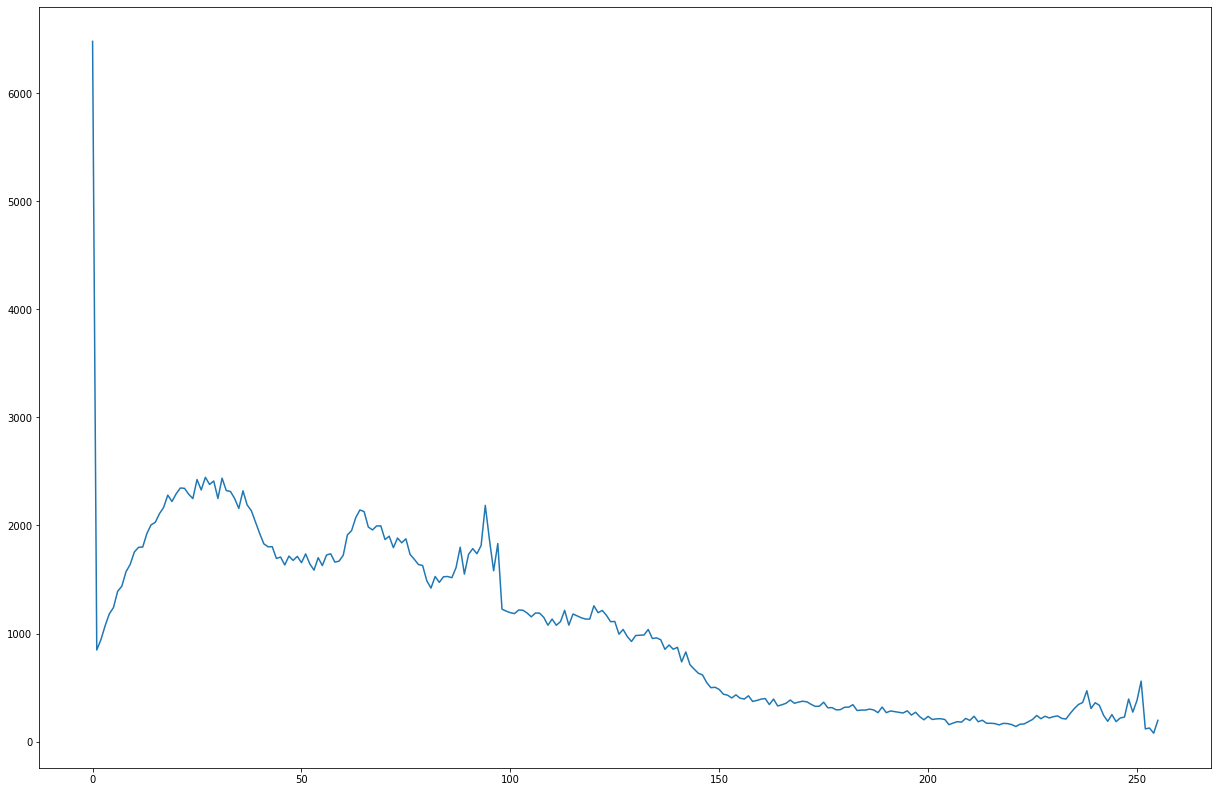

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21,14))
plt.plot([i for i in range(256)], histogram)
plt.show()
plt.close()

# `Low Pass Filter`

In [ ]:
threshold = 145
low_passed_image = np.zeros((img.shape[0], img.shape[1], 1))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j][0] < threshold:
            low_passed_image[i][j][0] = img[i][j][0]

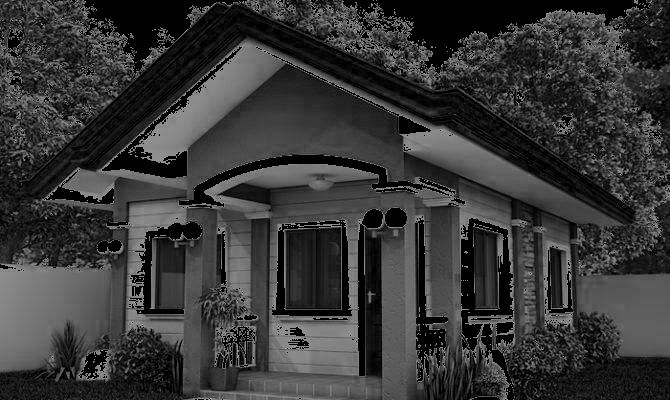

In [ ]:
cv2_imshow(low_passed_image)

# `High Pass Filter`

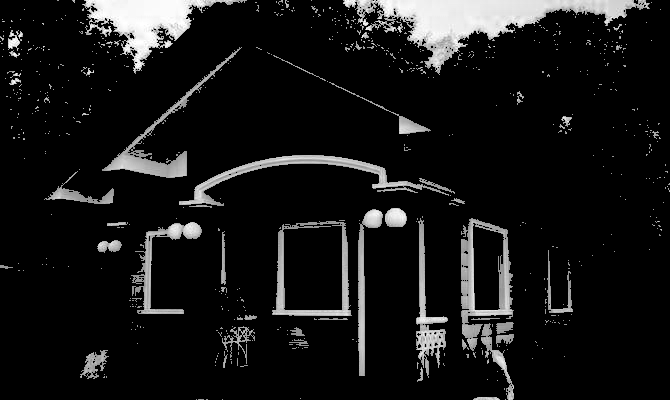

In [ ]:
high_passed_image = np.zeros((img.shape[0], img.shape[1], 1))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j][0] > threshold:
            high_passed_image[i][j][0] = img[i][j][0]

cv2_imshow(high_passed_image)

# `Gaussian Low Pass Filter`

In [ ]:
def get_value(u, v):
    try:
        # D = math.sqrt(((u-img.shape[0]//2)*(v-img.shape[0]//2))+((v-img.shape[1]//2)*(v-img.shape[1]//2)))
        D = math.sqrt((u-img.shape[0]/2)**2 + (v-img.shape[1]/2)**2)
    except:
        D = 1
        print(D)
    sigma = 80
    
    return np.exp((-1*(D*D))/(2*sigma*sigma))

def make_kernel():
    kernel = np.zeros((img.shape[0], img.shape[1], 1))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            kernel[i][j] = get_value(i, j)
    
    return kernel

kernel = make_kernel()
gray_fft = np.fft.fft2(img)
gray_fftshift = np.fft.fftshift(gray_fft)
dst = np.zeros_like(gray_fftshift)
dst_filtered = kernel * gray_fftshift
dst_ifftshift = np.fft.ifftshift(dst_filtered)
dst_ifft = np.fft.ifft2(dst_ifftshift)
dst = np.abs(np.real(dst_ifft))
dst = np.clip(dst,0,255)

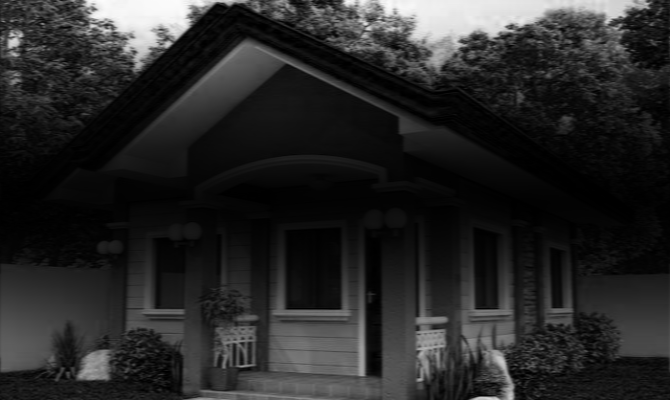

In [ ]:
cv2_imshow(dst)

# `Gaussian High Pass Filter`

In [ ]:
def get_value(u, v):
    try:
        # D = math.sqrt(((u-img.shape[0]//2)*(v-img.shape[0]//2))+((v-img.shape[1]//2)*(v-img.shape[1]//2)))
        D = math.sqrt((u-img.shape[0]/2)**2 + (v-img.shape[1]/2)**2)
    except:
        D = 1
        print(D)
    sigma = 80
    return 1 - np.exp((-1*(D*D))/(2*sigma*sigma))

def make_kernel():
    kernel = np.zeros((img.shape[0], img.shape[1], 1))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            kernel[i][j] = get_value(i, j)
    
    return kernel

kernel = make_kernel()
gray_fft = np.fft.fft2(img)
gray_fftshift = np.fft.fftshift(gray_fft)
dst = np.zeros_like(gray_fftshift)
dst_filtered = kernel * gray_fftshift
dst_ifftshift = np.fft.ifftshift(dst_filtered)
dst_ifft = np.fft.ifft2(dst_ifftshift)
dst = np.abs(np.real(dst_ifft))
dst = np.clip(dst,0,255)

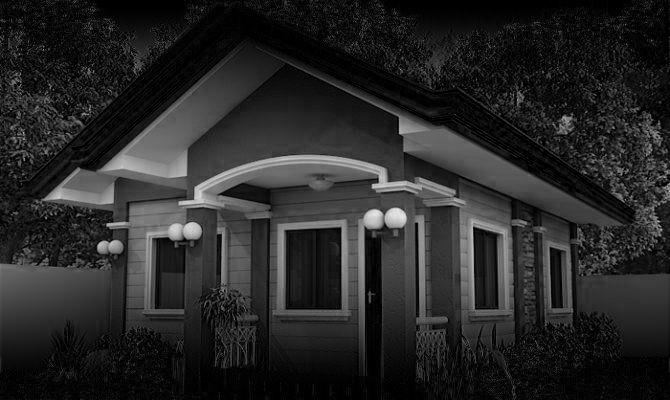

In [ ]:
cv2_imshow(dst)

The gaussian high pass filter seems working as a high pass filter and the gaussian low pass filter works as a blurring filter.